## Diabetese Prediction

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df = pd.read_csv('./Naive Bayes Diabetes Project/dataset/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


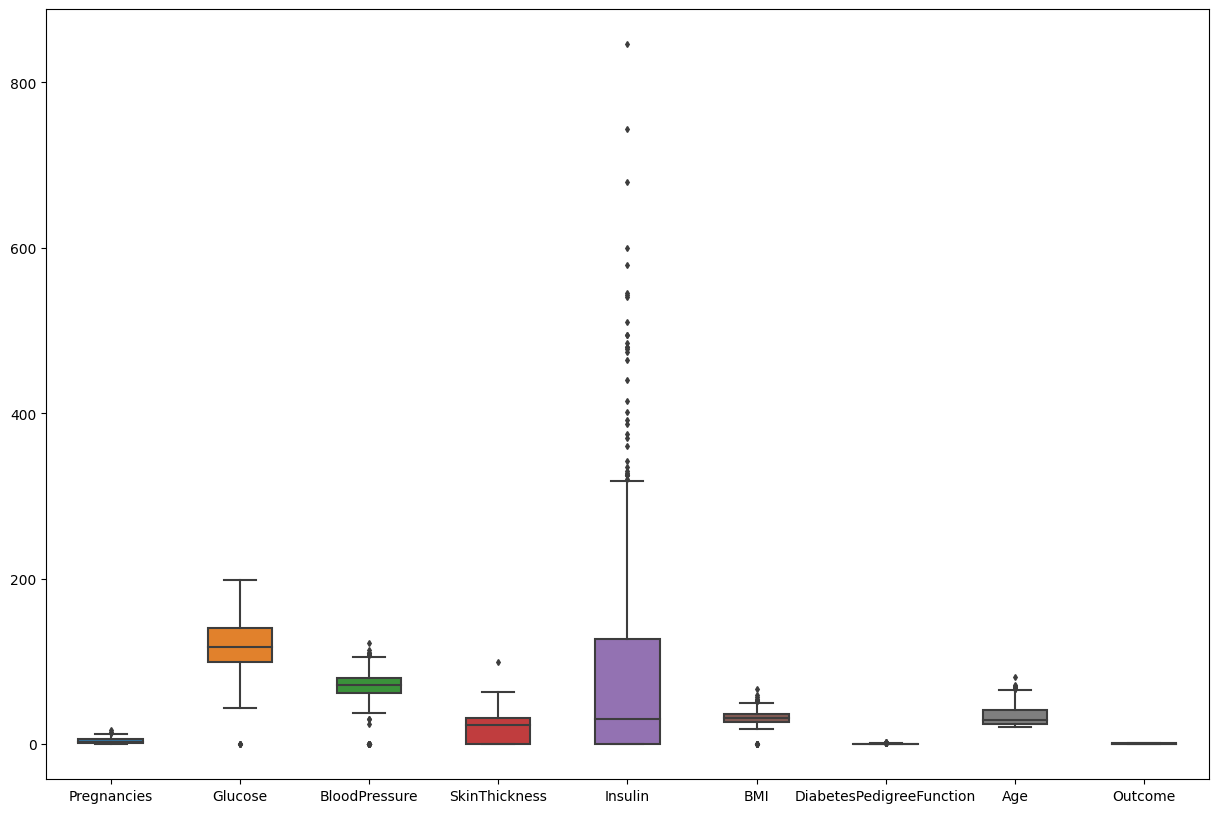

In [6]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df, fliersize=3, width=0.5)
plt.show()

In [7]:
df['Glucose'].mean()

120.89453125

In [8]:
df['Glucose']=df['Glucose'].replace(0, df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0, df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0, df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].replace(0, df['Insulin'].median())
df['BMI']=df['BMI'].replace(0, df['BMI'].mean())

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,94.652344,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,105.547598,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
# Split Independent (X) and Dependent Data
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [11]:
# Train, Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42, shuffle=True)

In [12]:
def standard_scaling(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.fit_transform(X_test)
    file = open('Naive Bayes Diabetes Project/model/standardScaler.pkl','wb')
    pickle.dump(scaler, file)
    file.close()
    return X_train_scaled, X_test_scaled

In [13]:
X_train_scaled, X_test_scaled = standard_scaling(X_train, X_test)

In [14]:
# Decision Tree Model Training With Hyperparameter Tuning
import warnings
warnings.filterwarnings('ignore')

In [15]:
parameters = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter':['best', 'random'],
    'max_depth':[1,2,3,4,4],
    'max_features':['auto', 'sqrt', 'log2']
}
classifier = DecisionTreeClassifier()

In [16]:
clf = GridSearchCV(classifier, param_grid=parameters, cv=5, scoring='accuracy', verbose=3)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.655 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.652 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.652 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.713 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.765 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=0.629 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=0.643 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=0.652 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=auto, splitte

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 4],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [17]:
clf.best_params_

{'criterion': 'log_loss',
 'max_depth': 4,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [18]:
clf.best_score_

0.7465817091454273

In [19]:
# Use these parameters to make the model
dt_classifier = DecisionTreeClassifier(criterion= 'log_loss', max_depth=4, max_features = 'auto', splitter='best')

In [20]:
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=4, max_features='auto')

In [21]:
y_pred = dt_classifier.predict(X_test)

In [22]:
# Accuracy of the Model
accuracy_score(y_test, y_pred)

0.7239583333333334

In [23]:
confusion_matrix(y_test, y_pred)

array([[97, 26],
       [27, 42]])

In [42]:
# Save the DT Classifier Model
file = open('./Naive Bayes Diabetes Project/model/dtcModelforDiabetesPrediction.pkl','wb')
pickle.dump(dt_classifier, file)
file.close()

In [24]:
# Support Vector Classifier Model Training With Hyperparameter Tuning

parameters = {
    'C':[0.1, 1, 10],
    'gamma':[1, 0.1, 0.01, 0.001, 0.0001],
    'kernel':['linear', 'polynomial', 'rbf']
}

classifier = SVC()

In [25]:
clf = GridSearchCV(classifier, param_grid=parameters, refit=True, scoring='accuracy', cv=3, verbose=3)

In [26]:
clf.fit(X_train, y_train)

Fitting 3 folds for each of 45 candidates, totalling 135 fits
[CV 1/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.802 total time=   0.1s
[CV 2/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.745 total time=   0.1s
[CV 3/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.745 total time=   0.1s
[CV 1/3] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/3] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 3/3] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 1/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.651 total time=   0.0s
[CV 2/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.656 total time=   0.0s
[CV 3/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.656 total time=   0.0s
[CV 1/3] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.802 total time=   0.1s
[CV 2/3] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.745 total time=   0.1s
[CV 3/3] END ...C=0.1, gamma=0.1, kernel=linear

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'polynomial', 'rbf']},
             scoring='accuracy', verbose=3)

In [27]:
clf.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'linear'}

In [28]:
svc_classifier = SVC(C=1, gamma=1, kernel='linear')

In [37]:
svc_classifier.fit(X_train, y_train)

SVC(C=1, gamma=1, kernel='linear')

In [38]:
y_pred = svc_classifier.predict(X_test)

In [39]:
accuracy_score(y_test, y_pred)

0.7395833333333334

In [40]:
# Save the SVC Model
file = open('./Naive Bayes Diabetes Project/model/svcModelforDiabetesPrediction.pkl','wb')
pickle.dump(svc_classifier, file)
file.close()

In [49]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [53]:
# Naive Bayes Model Training With Hyperparameter Tuning
gnv_classifier = GaussianNB()
gnv_classifier.fit(X_train, y_train)

GaussianNB()

In [54]:
y_pred = gnv_classifier.predict(X_test)

In [55]:
accuracy_score(y_test, y_pred)

0.7239583333333334

In [56]:
# Save the Naive Bayes Model
file = open('./Naive Bayes Diabetes Project/model/gnvModelforDiabetesPrediction.pkl', 'wb')
pickle.dump(gnv_classifier, file)
file.close()